In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Ross_Extent = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Ross_Extent)
fp.date_time(Ross_Extent)

,Extent,Date
0,1040455.516,1979-01-01
1,239334.118,1979-02-01
2,557365.154,1979-03-01
3,2054855.924,1979-04-01
4,2973925.625,1979-05-01
...,...,...
533,3137598.938,2023-06-01
534,3201783.453,2023-07-01
535,2973294.266,2023-08-01
536,3354839.711,2023-09-01


In [5]:
scaler = MinMaxScaler()
Ross_Extent['Extent'] = scaler.fit_transform(Ross_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 7
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Ross_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((520, 12, 1), (520,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Ross_model_LT7/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.3874 - root_mean_squared_error: 0.6224

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 6s 76ms/step - loss: 0.3858 - root_mean_squared_error: 0.6211 - val_loss: 0.3405 - val_root_mean_squared_error: 0.5835
Epoch 2/50
49/53 [==========================>...] - ETA: 0s - loss: 0.3151 - root_mean_squared_error: 0.5614

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.3141 - root_mean_squared_error: 0.5605 - val_loss: 0.2882 - val_root_mean_squared_error: 0.5369
Epoch 3/50
44/53 [=======================>......] - ETA: 0s - loss: 0.2666 - root_mean_squared_error: 0.5163

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.2658 - root_mean_squared_error: 0.5156 - val_loss: 0.2553 - val_root_mean_squared_error: 0.5053
Epoch 4/50
45/53 [========================>.....] - ETA: 0s - loss: 0.2314 - root_mean_squared_error: 0.4810

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.2267 - root_mean_squared_error: 0.4761 - val_loss: 0.2253 - val_root_mean_squared_error: 0.4746
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1798 - root_mean_squared_error: 0.4240

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.1884 - root_mean_squared_error: 0.4341 - val_loss: 0.1960 - val_root_mean_squared_error: 0.4428
Epoch 6/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1576 - root_mean_squared_error: 0.3969

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1540 - root_mean_squared_error: 0.3924 - val_loss: 0.1653 - val_root_mean_squared_error: 0.4066
Epoch 7/50
53/53 [==============================] - ETA: 0s - loss: 0.1228 - root_mean_squared_error: 0.3505

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.1228 - root_mean_squared_error: 0.3505 - val_loss: 0.1410 - val_root_mean_squared_error: 0.3755
Epoch 8/50
52/53 [============================>.] - ETA: 0s - loss: 0.0985 - root_mean_squared_error: 0.3138

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.1128 - val_root_mean_squared_error: 0.3358
Epoch 9/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0831 - root_mean_squared_error: 0.2883

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0778 - root_mean_squared_error: 0.2789 - val_loss: 0.0781 - val_root_mean_squared_error: 0.2795
Epoch 10/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0632 - root_mean_squared_error: 0.2514

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0621 - root_mean_squared_error: 0.2493 - val_loss: 0.0634 - val_root_mean_squared_error: 0.2519
Epoch 11/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0519 - root_mean_squared_error: 0.2278

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.0470 - root_mean_squared_error: 0.2167 - val_loss: 0.0424 - val_root_mean_squared_error: 0.2059
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0382 - root_mean_squared_error: 0.1954

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0356 - root_mean_squared_error: 0.1887 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1558
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0259 - root_mean_squared_error: 0.1609

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0259 - root_mean_squared_error: 0.1609 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1339
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0228 - root_mean_squared_error: 0.1511

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0228 - root_mean_squared_error: 0.1510 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1258
Epoch 15/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0192 - root_mean_squared_error: 0.1385

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0199 - root_mean_squared_error: 0.1409 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970
Epoch 16/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.1392

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0194 - root_mean_squared_error: 0.1391 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918
Epoch 17/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1305

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0163 - root_mean_squared_error: 0.1277 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1145
Epoch 21/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1297

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0856
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1013
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135
Epoch 25/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0129 - root_mean_squared_error: 0.1138 - val_loss: 0.0170 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0140 - root_mean_squared_error: 0.1183 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 32/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0135 - root_mean_squared_error: 0.1163

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0906
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 35/50
53/53 [==============================] - 1s 11ms/step - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0125 - root_mean_squared_error: 0.1116 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0854
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0076 - val_root_mean_square

INFO:tensorflow:Assets written to: Ross_model_LT7\assets


INFO:tensorflow:Assets written to: Ross_model_LT7\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0125 - root_mean_squared_error: 0.1119 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 49/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0119 - root_mean_squared_error: 0.1093 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0870
Epoch 50/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.5872814853986104 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

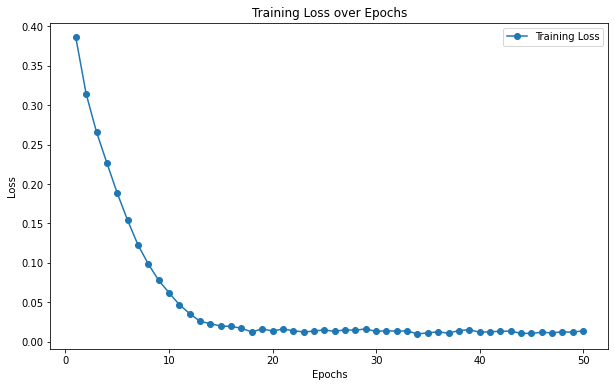

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

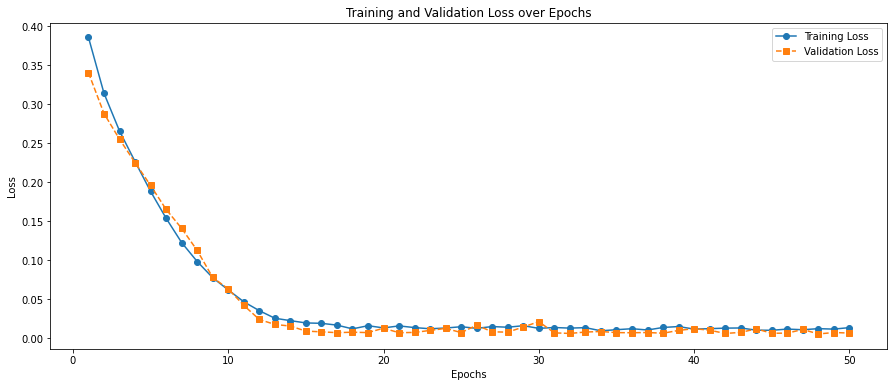

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Ross_model_LT7/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07896133178717141
MAE : 0.05842102436005509


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.641070e+06,3499167.351
1,2.444602e+06,2715890.297
2,1.125684e+06,1053272.694
3,4.227420e+05,368862.123
4,9.582846e+05,979418.298
5,1.778002e+06,2086269.569
6,2.650526e+06,2852731.016
7,3.291731e+06,3452823.613
8,3.532130e+06,3846843.974
9,3.825173e+06,4005222.451


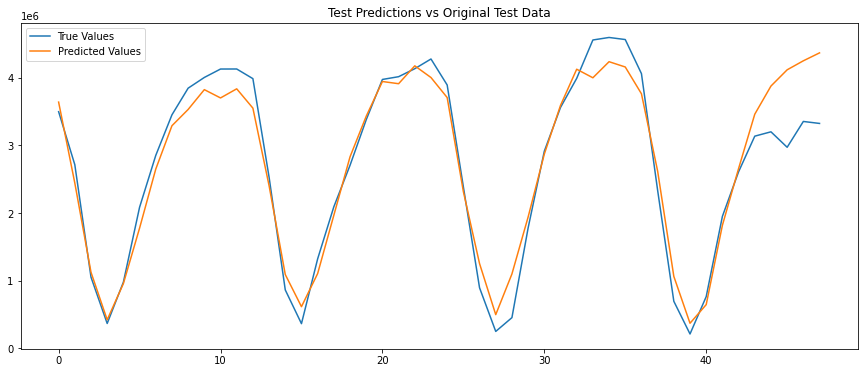

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

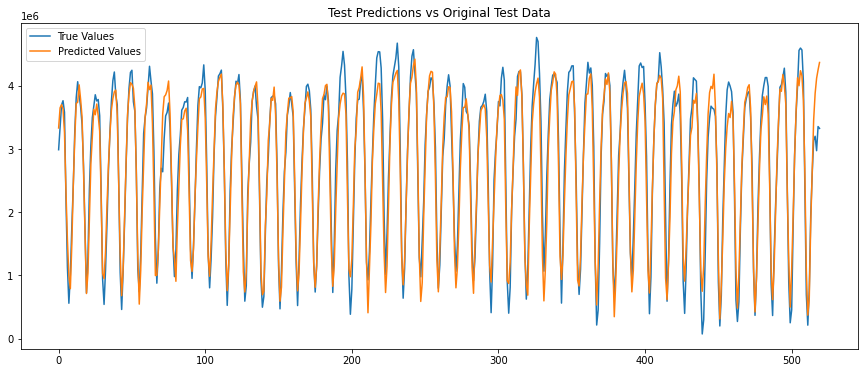

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()